## Home assignement

### Time series data visualization

**Task**: to depict the overall pricing behaviour of retailers (not grouped, see [Requested results 2]()) in various categories and produce conditional descriptive statistics for meaningful interpretation of for
instance the price dispersion and trajectories. <br>
```
What can be said of the price dispersion in these categories, and are there other notable trends?
```
*Hint: visually present the descriptive statistics using the ggplot2 package in R*

In [2]:
install.packages("data.table")
install.packages("psych")
install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘tmvnsim’, ‘mnormt’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
library(data.table)

In [ ]:
# LOAD DATA ################################################
# creating a dataframe from the pricing dataset
#data_pricing <- read.csv("home_assignment_data_pricing.csv")

data_pricing <- fread("home_assignment_data_pricing.csv")

## Explore the dataframe

In [ ]:
# EXPLORE DATA ################################################
# Using head or tail to look at part of it, 6 first lines by default
# here the first 3 lines

tail(data_pricing,3)

product_id,date,category,price,weekday,week,store_id,year,month,cpi_adjusted_price,log_of_cpi_adjusted_price,number_of_store_per_product_and_day,total_days_for_product,total_products_in_category
<int>,<date>,<chr>,<int>,<chr>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<int>,<int>,<int>
969989,2016-05-12,Headphones,656,Thursday,19,4819,2016,May,663.3025,6.497231,20,19403,987
969989,2016-05-12,Headphones,547,Thursday,19,1260,2016,May,553.0891,6.315519,20,19403,987
969989,2016-05-12,Headphones,394,Thursday,19,2380,2016,May,398.3859,5.987421,20,19403,98


In [ ]:
# Check the dimension, nrow x ncol
# 2612522 rows and 14 columns
dim(data_pricing)

[1] 2612522      14

In [ ]:
# Let's look for missing values, if any
colSums(is.na(data_pricing))

product_id                                date 
                                  0                                   0 
                           category                               price 
                                  0                                   0 
                            weekday                                week 
                                  0                                   0 
                           store_id                                year 
                                  0                                   0 
                    month_numerical                  cpi_adjusted_price 
                                  0                                   0 
          log_of_cpi_adjusted_price number_of_store_per_product_and_day 
                                  0                                   0 
             total_days_for_product          total_products_in_category 
                                  0                                   0

In [ ]:
# EXAMINE RESULTS ##########################################
# Check datatype of dataframe columns
str(data_pricing)

Classes ‘data.table’ and 'data.frame':	1110820 obs. of  14 variables:
 $ product_id                         : int  1030146 1030146 1030146 1030146 1030146 1030146 1030146 1030146 1030146 1030146 ...
 $ date                               : IDate, format: "2013-01-30" "2013-01-30" ...
 $ category                           : chr  "Cellphones" "Cellphones" "Cellphones" "Cellphones" ...
 $ price                              : int  1195 1195 1195 1195 1195 1195 1195 1195 1195 1195 ...
 $ weekday                            : chr  "Wednesday" "Wednesday" "Wednesday" "Thursday" ...
 $ week                               : int  5 5 5 5 5 5 5 5 5 5 ...
 $ store_id                           : int  6852 11909 16724 6852 11909 16724 6852 11909 16724 6852 ...
 $ year                               : int  2013 2013 2013 2013 2013 2013 2013 2013 2013 2013 ...
 $ month_numerical                    : int  1 1 1 1 1 1 2 2 2 2 ...
 $ cpi_adjusted_price                 : num  1225 1225 1225 1225 1225 ...
 $ l

In [ ]:
summary(data_pricing)

   product_id           date              category             price      
 Min.   :  13189   Min.   :2012-01-01   Length:2612522     Min.   :   19  
 1st Qu.: 164639   1st Qu.:2015-03-29   Class :character   1st Qu.:  252  
 Median : 541262   Median :2016-04-01   Mode  :character   Median :  661  
 Mean   : 929360   Mean   :2015-11-08                      Mean   : 1941  
 3rd Qu.: 951367   3rd Qu.:2016-10-17                      3rd Qu.: 2585  
 Max.   :3897064   Max.   :2017-02-25                      Max.   :21100  
   weekday               week          store_id          year     
 Length:2612522     Min.   : 1.00   Min.   :    1   Min.   :2012  
 Class :character   1st Qu.:11.00   1st Qu.:  658   1st Qu.:2015  
 Mode  :character   Median :28.00   Median : 2714   Median :2016  
                    Mean   :26.88   Mean   : 5822   Mean   :2015  
                    3rd Qu.:42.00   3rd Qu.: 8744   3rd Qu.:2016  
                    Max.   :53.00   Max.   :29792   Max.   :2017  
 month

In [ ]:
#library(psych)

describe(data_pricing)


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha


Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to max; returning -Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to max; returning -Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to max; returning -Inf”


,vars,n,mean,sd,min,max,range,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
product_id,1,2612522,9.293596e+05,1.107846e+06,13189.00000,3.897064e+06,3.883875e+06,6.854086e+02
date,2,2612522,NaN,NA,Inf,-Inf,-Inf,NA
category,3,2612522,NaN,NA,Inf,-Inf,-Inf,NA
price,4,2612522,1.940538e+03,2.801254e+03,19.00000,2.110000e+04,2.108100e+04,1.733095e+00
weekday,5,2612522,NaN,NA,Inf,-Inf,-Inf,NA
week,6,2612522,2.687916e+01,1.625761e+01,1.00000,5.300000e+01,5.200000e+01,1.005835e-02
store_id,7,2612522,5.821576e+03,7.228734e+03,1.00000,2.979200e+04,2.979100e+04,4.472314e+00
year,8,2612522,2.015350e+03,1.235826e+00,2012.00000,2.017000e+03,5.000000e+00,7.645878e-04
month_numerical,9,2612522,6.564006e+00,3.719976e+00,1.00000,1.200000e+01,1.100000e+01,2.301496e-03


In [ ]:
# Check structure of data column
tail(data_pricing$date)

[1] "2017-02-20" "2017-02-21" "2017-02-22" "2017-02-23" "2017-02-24"
[6] "2017-02-25"

In [ ]:
str(data_pricing$date)

 IDate[1:1110820], format: "2013-01-30" "2013-01-30" "2013-01-30" "2013-01-31" "2013-01-31" ...


In [ ]:
# Check dataframe row names, here the first 10 rows
row.names(data_pricing[1:10,])

[1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10"

In [ ]:
# Check date class, convert into date if not already
class(data_pricing$date)

[1] "IDate" "Date"

In [ ]:
# Unify the date class all over the dataset
date <- as.Date(data_pricing$date)
tail(date,5)
class(date)

[1] "2016-05-12" "2016-05-12" "2016-05-12" "2016-05-12" "2016-05-12"

[1] "Date"

In [ ]:
# Thus no need to convert the string of dates into R 'Date' object
#sub_headphones$date <- as.Date(sub_headphones$date, "%Y-%m-%d"); head(sub_headphones$date,3)

In [ ]:
# convert month numbers to names, using a built-in constant
data_pricing$month_numerical <- factor(data_pricing$month_numerical)
levels(data_pricing$month_numerical) <- month.abb

In [ ]:
# rename month_numerical column into simply month

# out of safety, let's use another variable df for later us
# while we keep doing data manipulation with data_pricing
#df <- data.frame(data_pricing)

colnames(data_pricing)[9] <- 'month'

In [ ]:
head(data_pricing, 5)

product_id,date,category,price,weekday,week,store_id,year,month,cpi_adjusted_price,log_of_cpi_adjusted_price,number_of_store_per_product_and_day,total_days_for_product,total_products_in_category
<int>,<date>,<chr>,<int>,<chr>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<int>,<int>,<int>
1030146,2013-01-30,Cellphones,1195,Wednesday,5,6852,2013,Jan,1224.607,7.110375,3,4464,67
1030146,2013-01-30,Cellphones,1195,Wednesday,5,11909,2013,Jan,1224.607,7.110375,3,4464,67
1030146,2013-01-30,Cellphones,1195,Wednesday,5,16724,2013,Jan,1224.607,7.110375,3,4464,67
1030146,2013-01-31,Cellphones,1195,Thursday,5,6852,2013,Jan,1224.607,7.110375,3,4464,67
1030146,2013-01-31,Cellphones,1195,Thursday,5,11909,2013,Jan,1224.607,7.110375,3,4464,67


In [4]:
# load dplyr
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
# Identify unique category items in the dataframe
# using distinct function
distinct(data.frame(data_pricing$category))


data_pricing.category
<chr>
Cellphones
Headphones


In [ ]:
#Headphones <- subset(data_pricing, category == "Headphones")

In [ ]:
dim(Headphones)

[1] 2185645      14

In [7]:
# Let's focus on one of these categories, Xbox 360 in my case
#xbox360 <- subset(data_pricing, category == "Xbox 360")

## Or load csv files you would have saved previously
xbox360 <- fread("xbox360.csv")

In [9]:
# remove the new index column created after saving as csv
xbox360 <- subset(xbox360[, 2:15])

tail(xbox360, 4)

product_id,date,category,price,weekday,week,store_id,year,month,cpi_adjusted_price,log_of_cpi_adjusted_price,number_of_store_per_product_and_day,total_days_for_product,total_products_in_category
<int>,<date>,<chr>,<int>,<chr>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>
3169815,2017-02-22,Xbox 360,249,Wednesday,8,1595,2017,Feb,249,5.517453,8,3330,64
3169815,2017-02-23,Xbox 360,249,Thursday,8,1595,2017,Feb,249,5.517453,8,3330,64
3169815,2017-02-24,Xbox 360,249,Friday,8,1595,2017,Feb,249,5.517453,8,3330,64
3169815,2017-02-25,Xbox 360,249,Saturday,8,1595,2017,Feb,249,5.517453,8,3330,64


In [10]:
# Explore this category's dataframe
# check the dataframe dimensions (nrows, ncols)
# 275068 rows and 14 columns here
dim(xbox360)

[1] 275068     14

In [12]:
## Provide basic stats
summary(xbox360)

   product_id           date              category             price       
 Min.   :  43931   Min.   :2012-08-23   Length:275068      Min.   :  29.0  
 1st Qu.: 932875   1st Qu.:2015-10-29   Class :character   1st Qu.: 179.0  
 Median :1619816   Median :2016-05-21   Mode  :character   Median : 257.0  
 Mean   :1693781   Mean   :2016-03-20                      Mean   : 307.4  
 3rd Qu.:2524808   3rd Qu.:2016-10-30                      3rd Qu.: 399.0  
 Max.   :3730337   Max.   :2017-02-25                      Max.   :4062.0  
   weekday               week         store_id          year     
 Length:275068      Min.   : 1.0   Min.   :    1   Min.   :2012  
 Class :character   1st Qu.:10.0   1st Qu.:  127   1st Qu.:2015  
 Mode  :character   Median :28.0   Median :  578   Median :2016  
                    Mean   :26.7   Mean   : 4164   Mean   :2016  
                    3rd Qu.:42.0   3rd Qu.: 7088   3rd Qu.:2016  
                    Max.   :53.0   Max.   :28603   Max.   :2017  
    mo

In [14]:
library(psych)

describe(xbox360)

Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to max; returning -Inf”


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
product_id,1,275068,1.693781e+06,9.229935e+05,1.619816e+06,1.672552e+06,1.050268e+06,43931.000000,3.730337e+06,3.686406e+06,0.2452755608,-0.9361981,1.759862e+03
date,2,275068,NaN,NA,NA,NaN,NA,Inf,-Inf,-Inf,NA,NA,NA
category*,3,275068,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000,1.000000e+00,0.000000e+00,NaN,NaN,0.000000e+00
price,4,275068,3.074076e+02,1.741157e+02,2.570000e+02,2.877028e+02,1.363992e+02,29.000000,4.062000e+03,4.033000e+03,2.4447214481,30.9657353,3.319846e-01
weekday*,5,275068,3.998033e+00,2.001152e+00,4.000000e+00,3.997542e+00,2.965200e+00,1.000000,7.000000e+00,6.000000e+00,0.0006888473,-1.2507776,3.815576e-03
week,6,275068,2.669561e+01,1.649433e+01,2.800000e+01,2.671679e+01,2.223900e+01,1.000000,5.300000e+01,5.200000e+01,-0.0537234780,-1.3837414,3.144956e-02
store_id,7,275068,4.163917e+03,6.117672e+03,5.780000e+02,2.991438e+03,6.908916e+02,1.000000,2.860300e+04,2.860200e+04,1.4957066629,1.2511424,1.166450e+01
year,8,275068,2.015719e+03,8.395034e-01,2.016000e+03,2.015768e+03,0.000000e+00,2012.000000,2.017000e+03,5.000000e+00,-0.8510242913,1.3324687,1.600672e-03
month*,9,275068,6.397589e+00,3.401710e+00,6.000000e+00,6.345253e+00,4.447800e+00,1.000000,1.200000e+01,1.100000e+01,0.1683971441,-1.2442420,6.486005e-03


In [16]:
# save it into a dataframe for later visualization
dsb <- describe(xbox360)

head(dsb,3)

Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to max; returning -Inf”


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
product_id,1,275068,1693781,922993.5,1619816,1672552,1050268,43931,3730337,3686406,0.2452756,-0.9361981,1759.862
date,2,275068,NaN,NA,NA,NaN,NA,Inf,-Inf,-Inf,NA,NA,NA
category*,3,275068,1,0.0,1,1,0,1,1,0,NaN,NaN,0.000


In [15]:
str(xbox360)

Classes ‘data.table’ and 'data.frame':	275068 obs. of  14 variables:
 $ product_id                         : int  1208489 1208489 1208489 1208489 1208489 1208489 1208489 1208489 1208489 1208489 ...
 $ date                               : IDate, format: "2015-12-04" "2015-12-05" ...
 $ category                           : chr  "Xbox 360" "Xbox 360" "Xbox 360" "Xbox 360" ...
 $ price                              : int  443 443 443 443 443 443 443 443 443 443 ...
 $ weekday                            : chr  "Friday" "Saturday" "Sunday" "Monday" ...
 $ week                               : int  49 49 49 50 50 50 50 50 50 50 ...
 $ store_id                           : int  6843 6843 6843 6843 6843 6843 6843 6843 6843 6843 ...
 $ year                               : int  2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 ...
 $ month                              : chr  "Dec" "Dec" "Dec" "Dec" ...
 $ cpi_adjusted_price                 : num  451 451 451 451 451 ...
 $ log_of_cpi_adjusted_price 

In [19]:
install.packages("qwarps2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘qwarps2’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [21]:
#library(qwraps2)

summary_table(xbox360)

ERROR: ignored

In [11]:
# select a fraction of a dataframe for quicker analysis of trends and patterns
# 30% of the whole dataframe here
sub_xbox360 <- sample_frac(xbox360, 0.3)

In [22]:
dim(sub_xbox360)

[1] 82520    14

In [ ]:
str(xbox360)

Classes ‘data.table’ and 'data.frame':	0 obs. of  14 variables:
 $ product_id                         : int 
 $ date                               : 'IDate' int(0) 
 $ category                           : chr 
 $ price                              : int 
 $ weekday                            : chr 
 $ week                               : int 
 $ store_id                           : int 
 $ year                               : int 
 $ month_numerical                    : int 
 $ cpi_adjusted_price                 : num 
 $ log_of_cpi_adjusted_price          : num 
 $ number_of_store_per_product_and_day: int 
 $ total_days_for_product             : int 
 $ total_products_in_category         : int 
 - attr(*, ".internal.selfref")=<externalptr> 


In [ ]:
# Quick visualization to have a feel of the data
#plot(xbox360) # takes too long to load for 275068 rows

# Thus let's split the dataset into training and tesing data
# Install needed packages
install.packages("caTools")

library(caTools)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’




In [ ]:

set.seed(123) # to shuffle the data in a way defined by the seed value
# so that we always have the same dataset everytime seeding data

sample_xbox360 = sample.split(xbox360, SplitRatio = .70)

# Also build train and test datasets for later predictive analytics
train_xbox360 = subset(xbox360, sample_xbox360 == TRUE)
test_xbox360 = subset(xbox360, sample_xbox360 == FALSE)

In [ ]:
#write.csv(train_xbox360, "train_xbox360.csv")
#write.csv(test_xbox360, "test_xbox360.csv")

In [ ]:
head(train_xbox360,3)

,X,product_id,date,category,price,weekday,week,store_id,year,month,cpi_adjusted_price,log_of_cpi_adjusted_price,number_of_store_per_product_and_day,total_days_for_product,total_products_in_category
,<int>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>
1,1,1208489,2015-12-04,Xbox 360,443,Friday,49,6843,2015,Dec,450.7826,6.110985,6,7216,64
3,3,1208489,2015-12-06,Xbox 360,443,Sunday,49,6843,2015,Dec,450.7826,6.110985,6,7216,64
6,6,1208489,2015-12-09,Xbox 360,443,Wednesday,50,6843,2015,Dec,450.7826,6.110985,6,7216,64


In [ ]:
head(test_xbox360,3)

,X,product_id,date,category,price,weekday,week,store_id,year,month,cpi_adjusted_price,log_of_cpi_adjusted_price,number_of_store_per_product_and_day,total_days_for_product,total_products_in_category
,<int>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>
2,2,1208489,2015-12-05,Xbox 360,443,Saturday,49,6843,2015,Dec,450.7826,6.110985,6,7216,64
4,4,1208489,2015-12-07,Xbox 360,443,Monday,50,6843,2015,Dec,450.7826,6.110985,6,7216,64
5,5,1208489,2015-12-08,Xbox 360,443,Tuesday,50,6843,2015,Dec,450.7826,6.110985,6,7216,64


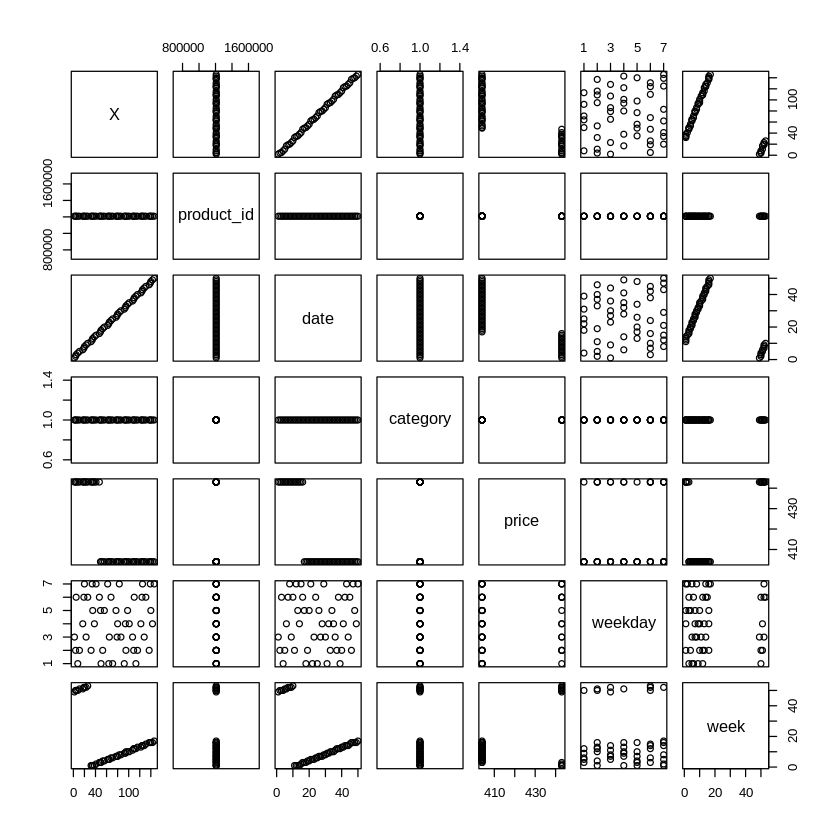

In [ ]:
# Let's now plot this data subset, here the first 50 rows & 7 columns
plot(test_xbox360[1:50, 1:7])

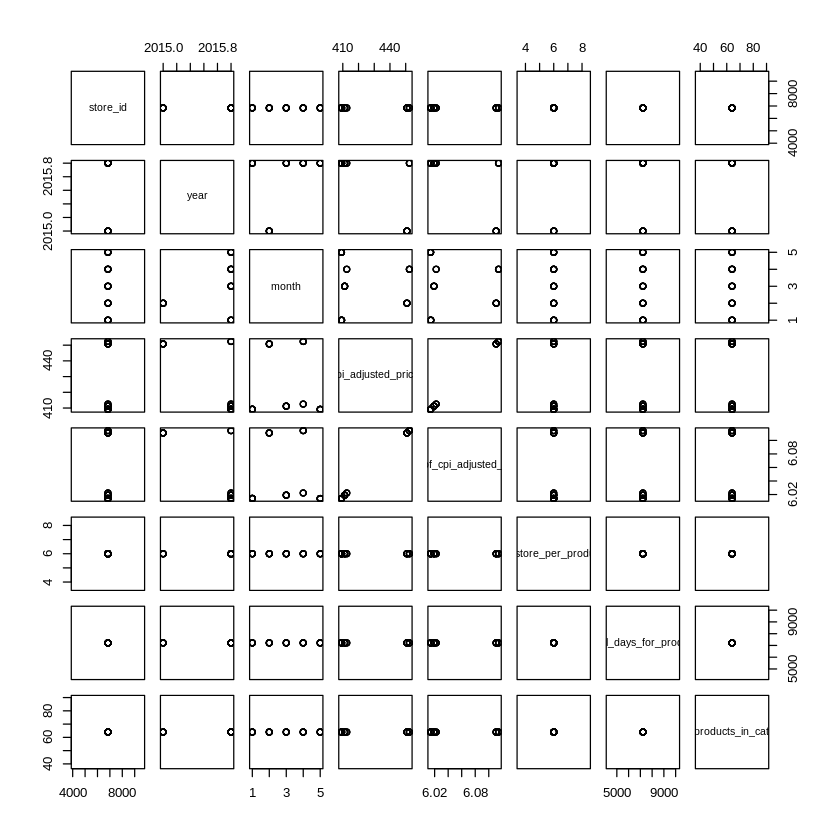

In [ ]:
# Now plot this for the following 7 columns
plot(test_xbox360[1:50, 8:15])

In [ ]:
#?geom_point(mapping = )

In [ ]:
# Save the xbox 360 dataframe as a csv file for possible later use
#write.csv(xbox360, "xbox360.csv")

In [ ]:
# Now let's subset the dataframe on columns of interest
#sub_xbox360 <- subset(xbox360, select = c("date","price","week","store_id", "year", "month"))

#tail(sub_xbox360, 4)


,date,price,week,store_id,year,month
,<chr>,<int>,<int>,<int>,<int>,<chr>
275065,2017-02-22,249,8,1595,2017,Feb
275066,2017-02-23,249,8,1595,2017,Feb
275067,2017-02-24,249,8,1595,2017,Feb
275068,2017-02-25,249,8,1595,2017,Feb


In [ ]:
# Save the subset dataframe as a csv file for possible later use
#write.csv(sub_xbox360, "sub_xbox360.csv")

### Visualizations

In [24]:
library(ggplot2)


Attaching package: ‘ggplot2’


The following objects are masked from ‘package:psych’:

    %+%, alpha




In [ ]:
#plot(sub_xbox360$year, sub_headphones$price, type = "l", xlab = "year", ylab = "price")

Warning message:
“Removed 1 rows containing missing values (geom_point).”


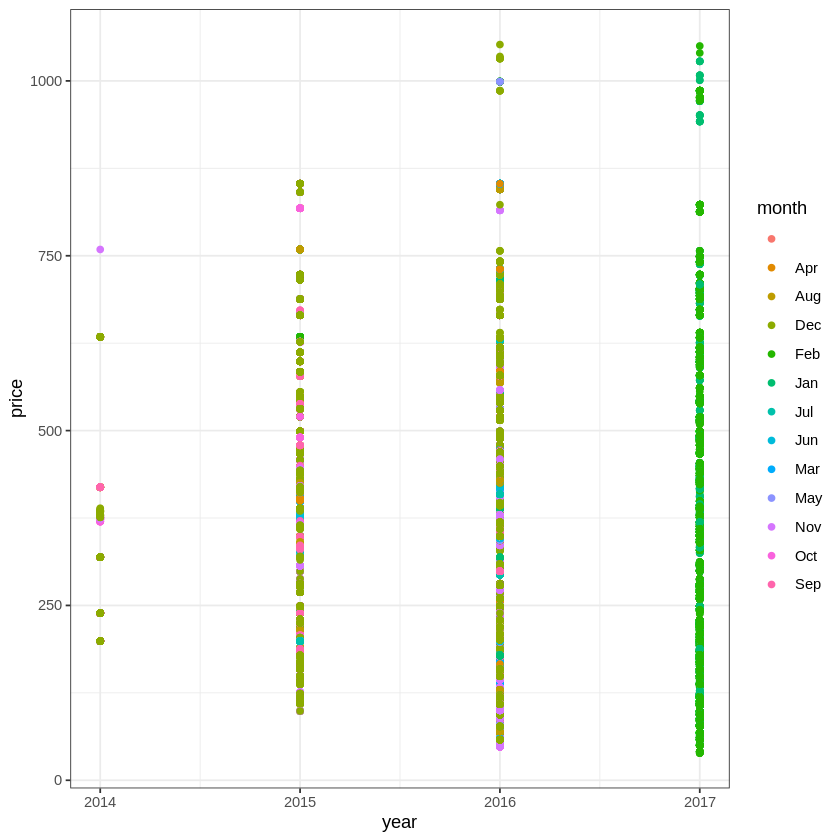

In [ ]:
# PLOTS RESULTS ##########################################
# Let's explore the data by creating a line plot of the time series dataframe
# coloured by week

plot1 <- ggplot(xbox360, aes(year, price, colour = month))

plot1 + geom_point() +
theme_bw()
#ggsave("plot1.png",width=6, height=4,dpi=300)


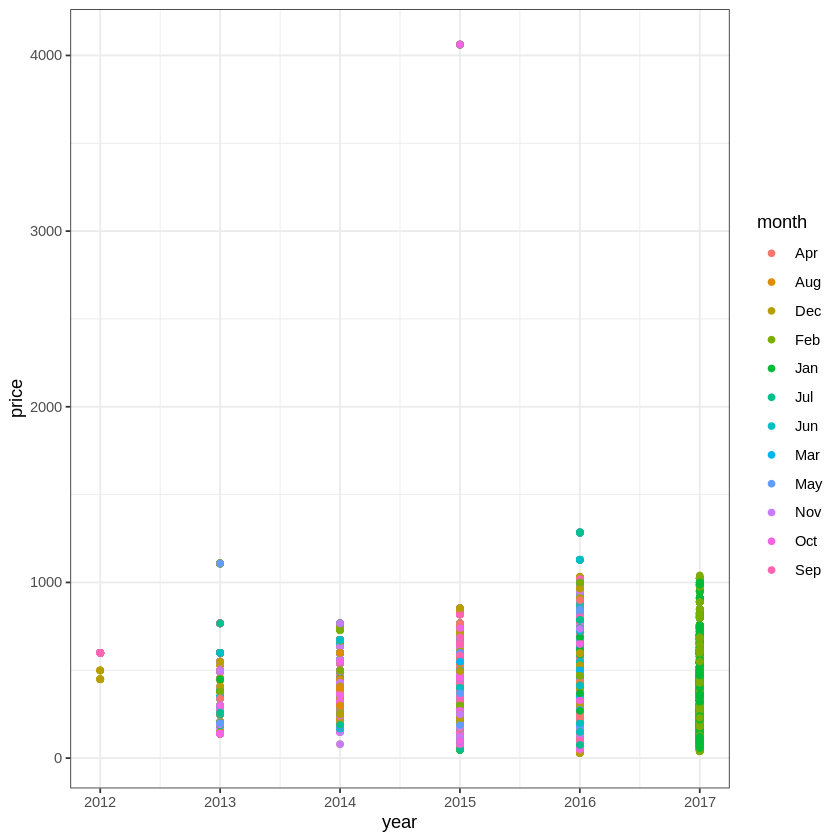

In [25]:
# Let's use a subset of xbox360 dataframe 
# it will make the analysis and visualization faster
# while the df will be keeping the same behavious
plot01 <- ggplot(sub_xbox360, aes(year, price, colour = month))

plot01 + geom_point() +
theme_bw()
#ggsave("plot1.png",width=6, height=4,dpi=300)


In [39]:
# PLOTS RESULTS ##########################################
# Let's explore the data by creating a line plot of the time series dataframe
# coloured by week

# First, let's convert store_id
# from int (continuous variable) to factor (categorical)
sub_xbox360$store_id <- as.factor(sub_xbox360$store_id)

# plot results for sub_xbox360 instead of the whole dataset
plot2 <- ggplot(sub_xbox360, aes(year, month, size = price, colour = store_id))

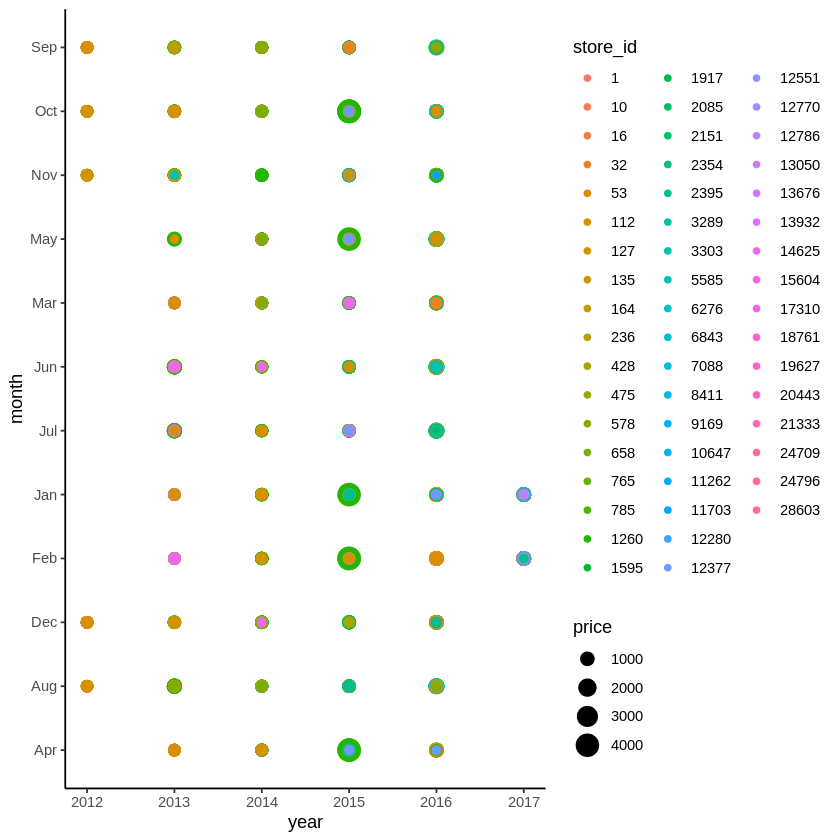

In [40]:
plot2 + 
geom_point() +
theme_classic() +
ggsave("plot2.png",width=6, height=4,dpi=300)


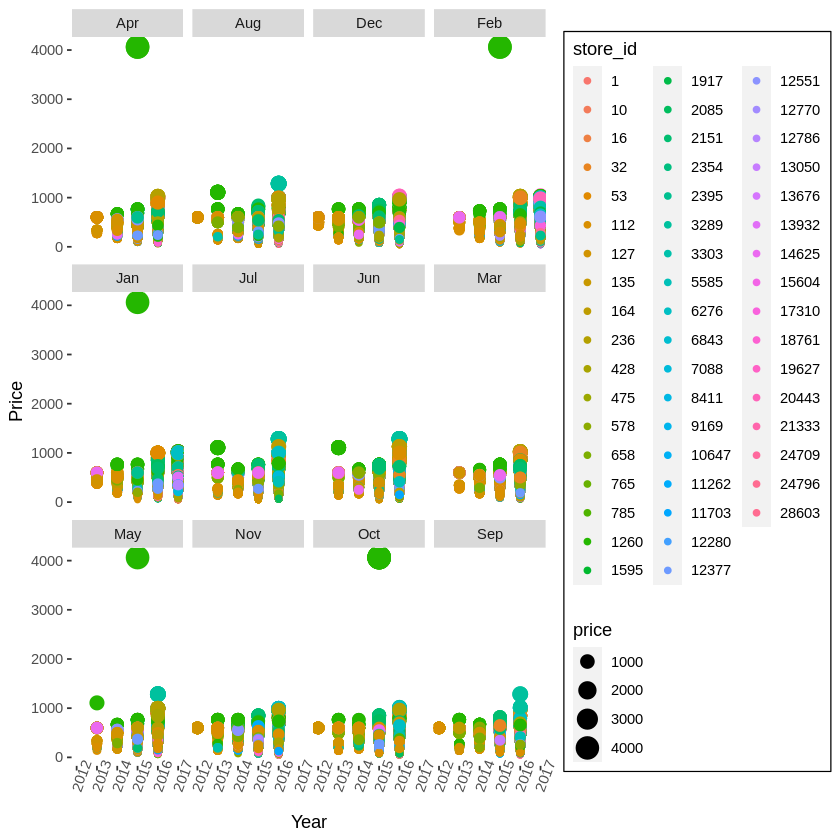

In [41]:
# Create scatter Plot
plot3 <- ggplot(sub_xbox360 , aes(x = year , y = price))

plot3 +
       geom_point(aes(color = store_id, size = price)) +
       facet_wrap(~month) +
       #geom_text( aes(label = row.names(sub_xbox360)) , hjust = 1 , vjust = -1.5 ,size = 2.5 ) +
       ylab("Price") + 
       xlab("Year") +
       theme(
         panel.background = element_rect(fill = "transparent"), # bg of the panel
         plot.background = element_rect(fill = "transparent", color = NA), # bg of the plot
         panel.grid.major = element_blank(), # get rid of major grid
         panel.grid.minor = element_blank(), # get rid of minor grid
         #legend.background = element_rect(fill = "transparent"), # get rid of legend bg
         #legend.box.background = element_rect(fill = "transparent"), # get rid of legend panel bg
         axis.text.x = element_text(angle = 70)
         ) +
       ggsave("plot3.png",width=6, height=4,dpi=300)
       
# Run and display plot


We identify already here a few data points outliers over a few months. Let's explore it a bit further later on.

In [ ]:
plot02 <- ggplot(xbox360, aes(x = year, y = price, group = 1))

plot02 + geom_line(linetype = "dashed") +
geom_point() +
theme_minimal() +
ggsave("plot02.png",width=6, height=4,dpi=300)


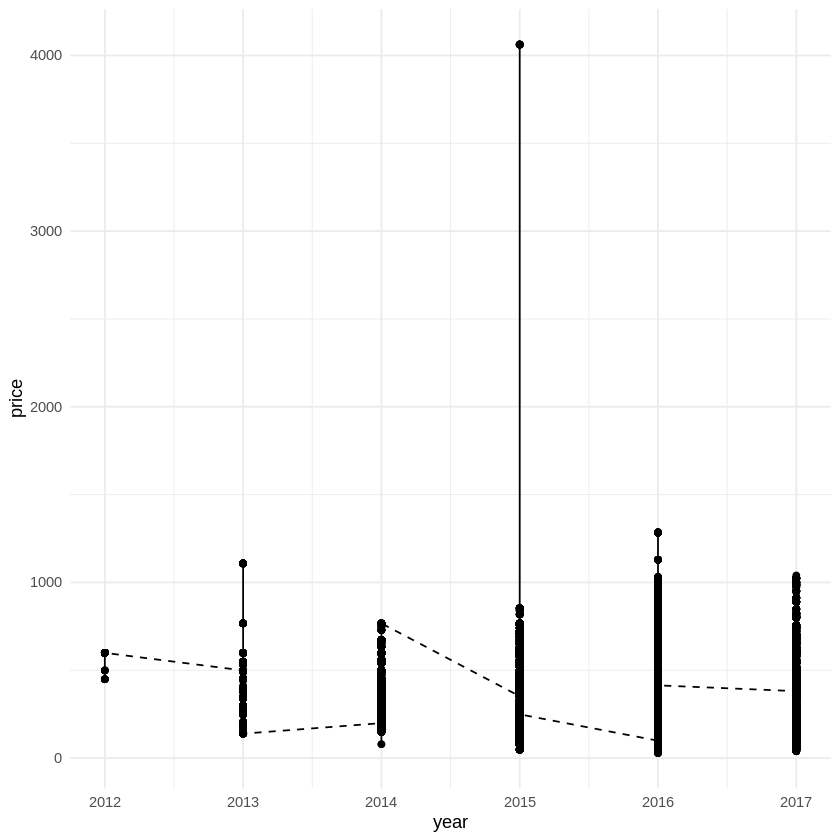

In [27]:
plot002 <- ggplot(sub_xbox360, aes(x = year, y = price, group = 1))

plot002 + geom_line(linetype = "dashed") +
geom_point() +
theme_minimal() +
ggsave("plot02.png",width=6, height=4,dpi=300)


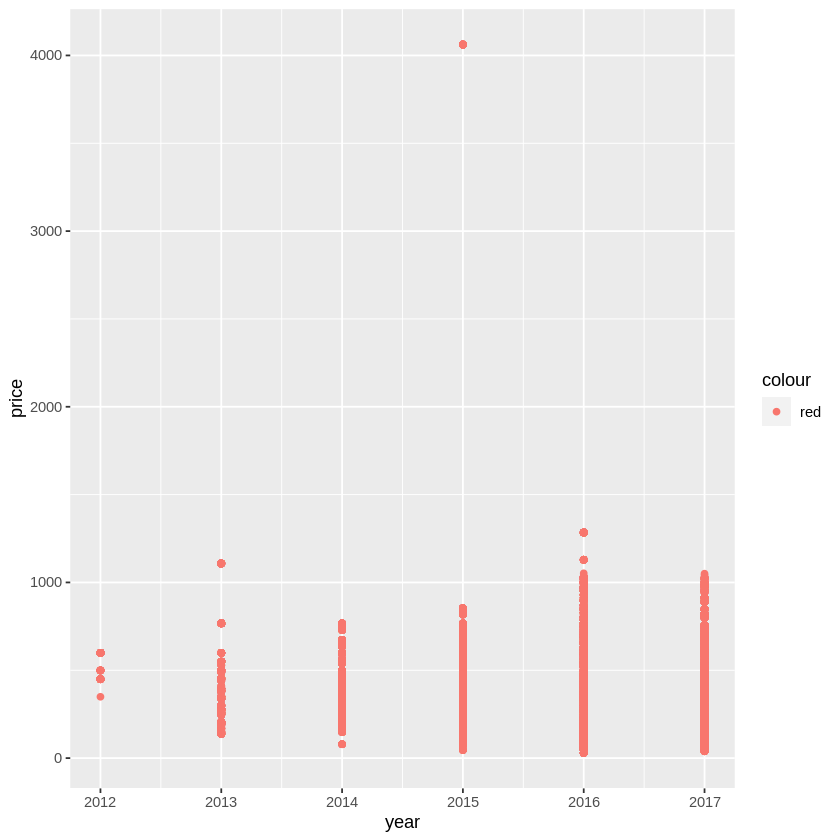

In [ ]:
plot3 <- ggplot(sub_xbox360, aes(x = year, y = price, colour = "red"))

plot3 + geom_point()


There seeems to be outliers price wise above 4000, most of which being priced below 1500.<br>
Let's use box plot to illustrate it better.

In [45]:
# Let's also attempt to label data including outliers
# in order to identify relevant related information such as store_id
bxp1 <- ggplot(sub_xbox360, aes(x = year, y = price, group = 1))

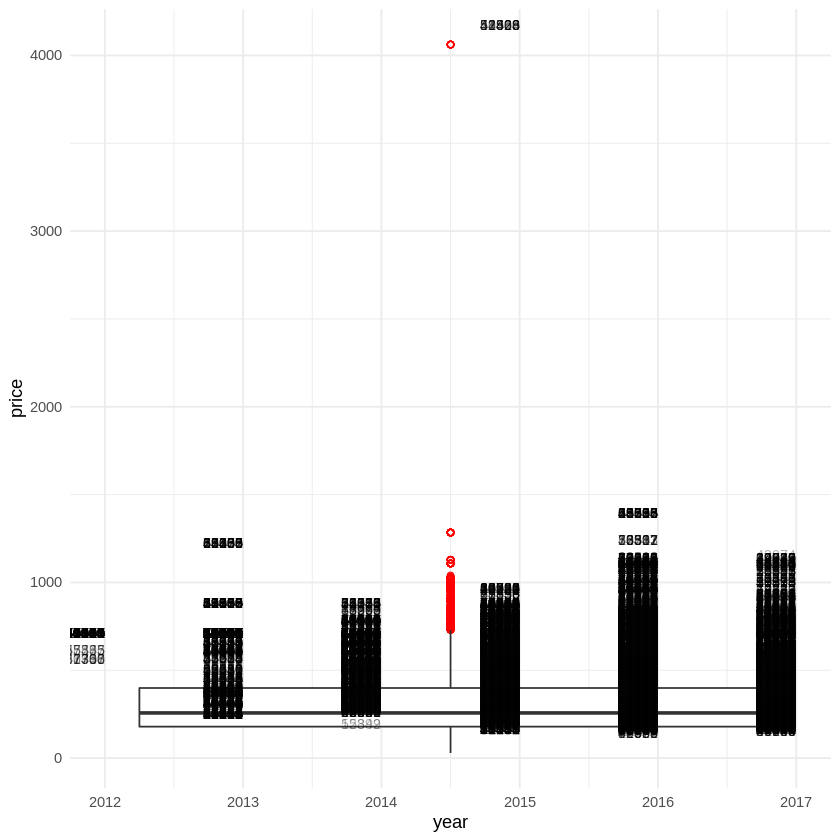

In [47]:
bxp1 +
geom_boxplot(outlier.colour = "red", outlier.shape = 1) +
geom_text( aes(label = row.names(sub_xbox360)) , hjust = 1 , vjust = -1.5 ,size = 3, alpha = 0.3 ) +
theme_minimal() +
ggsave("bxp1.png",width=6, height=4,dpi=300)

Let's visualize the distribution of the data by combining box and violin plots for better visualization of the outliers. To justify possibly to dismiss them if their effect is not significant.

In [49]:
install.packages("gridExtra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [50]:
library(gridExtra)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”


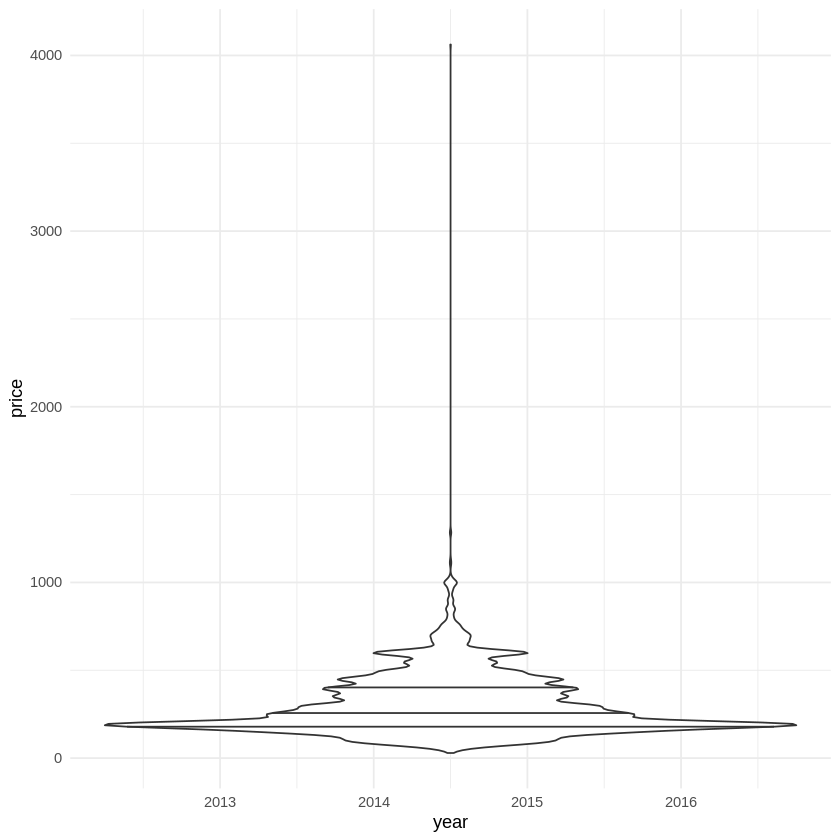

In [127]:
vp1 <- ggplot(sub_xbox360, aes(x = year, y = price))

# add horizontal lines at Q1, Q2, and Q3
vp1 + 
geom_violin(draw_quantiles = c(0.25, 0.5, 0.75)) +
#geom_boxplot(outlier.colour = "red", outlier.shape = 1) +
#ggtitle("Violin plot") +
theme_minimal() +
ggsave("vp1.png",width=6, height=4,dpi=300)

Warning message:
“Continuous x aesthetic -- did you forget aes(group=...)?”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message:
“Continuous x aesthetic -- did you forget aes(group=...)?”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”


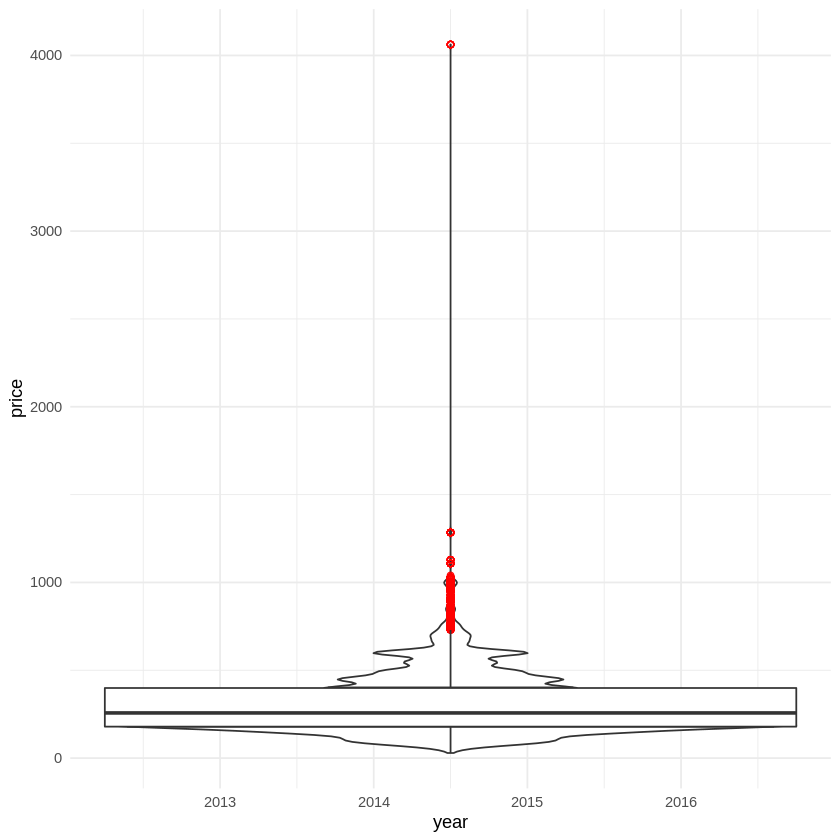

In [55]:
# combine box and violin plots with outliers highlighted
vp1 + 
geom_violin(draw_quantiles = c(0.25, 0.5, 0.75)) +
geom_boxplot(outlier.colour = "red", outlier.shape = 1) +
#ggtitle("Violin plot") +
theme_minimal() +
ggsave("vp2.png",width=6, height=4,dpi=300)

Warning message:
“Removed 12 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 12 rows containing non-finite values (stat_boxplot).”


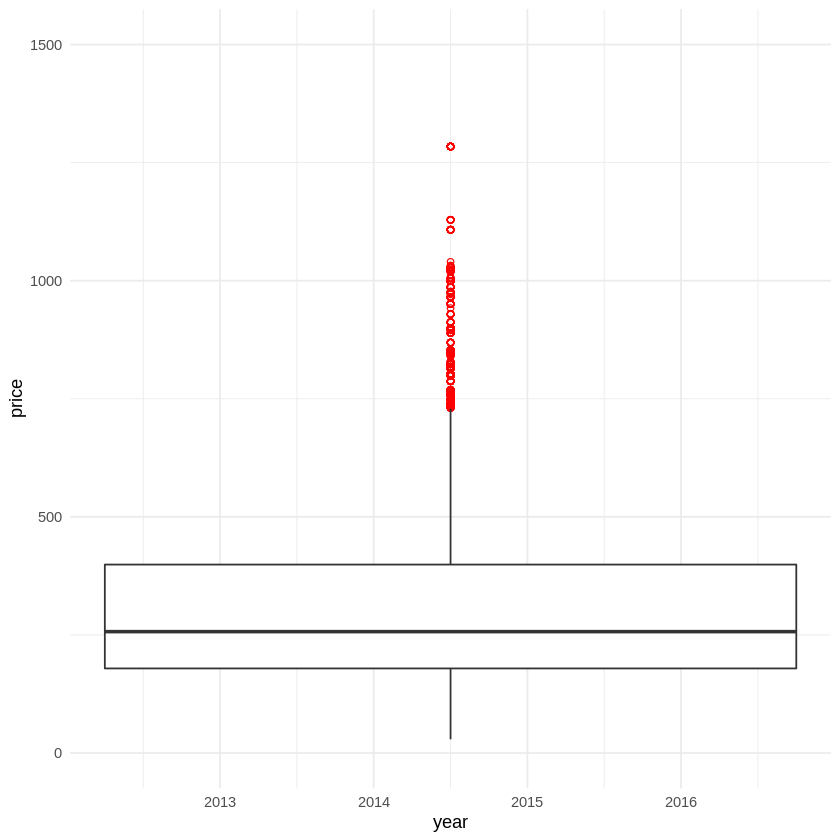

In [51]:
# Let's plot them using boxplots
# with possible outliers in red
# and removes all data points outside the given range

bxp1 + 
geom_boxplot(outlier.colour = "red", outlier.shape = 1) +
scale_y_continuous(limits = c(0, 1500)) +
theme_minimal() +
ggsave("bxp01.png",width=6, height=4,dpi=300)

Interpretation of the boxplot:<br>


```
The two 'hinges' or extremities of the box represent the first and third quartile, i.e., close to quantile(x, c(1,3)/4).</br>
Boxplot statistical values are represented mainly via the vector *stats* of are a vector of length 5, containing the extreme of the lower whisker, the lower ‘hinge’, the median, the upper ‘hinge’ and the extreme of the upper whisker.<br>
```


[source](http://www.physics.csbsju.edu/stats/box2.html)

In [56]:
tail(sub_xbox360,3)

product_id,date,category,price,weekday,week,store_id,year,month,cpi_adjusted_price,log_of_cpi_adjusted_price,number_of_store_per_product_and_day,total_days_for_product,total_products_in_category
<int>,<date>,<chr>,<int>,<chr>,<int>,<fct>,<int>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>
471162,2016-06-13,Xbox 360,149,Monday,24,11703,2016,Jun,150.5016,5.013974,9,6911,64
2715683,2016-06-28,Xbox 360,414,Tuesday,26,5585,2016,Jun,418.1722,6.035893,6,4227,64
1180267,2015-11-19,Xbox 360,249,Thursday,47,127,2015,Nov,253.7459,5.536333,4,3101,64


### Mahalanobis Distance

[source](https://en.wikipedia.org/wiki/Mahalanobis_distance)

It is a measure of the distance between a point P and a distribution D; it is a multi-dimensional generalization of the measure of how many standard deviations is P away from the mean of D. That distance (MD) grows as P moves away from the mean of D along each principal component axis*.<br>
Mahalanobis distance can also be defined as a dissimilarity measure between two random vectors {\displaystyle {\vec {x}}}{\vec {x}} and {\displaystyle {\vec {y}}}{\vec {y}} of the same distribution with the covariance matrix S. Then, here is a quick reminder of what covariance matrix is.<br>

Also called dispersion matrix, variance matrix, or variance–covariance matrix, it is a square matrix giving the covariance between each pair of elements of a given random vector. Any covariance matrix is symmetric and positive semi-definite and its main diagonal contains variances (i.e., the covariance of each element with itself). Intuitively, the covariance matrix generalizes the notion of variance to multiple dimensions.

[source](https://en.wikipedia.org/wiki/Covariance_matrix)

* [source](https://en.wikipedia.org/wiki/Principal_component_analysis) A sequence of {\displaystyle p}p direction vectors, where the {\displaystyle i^{\text{th}}}i^{{\text{th}}} vector is the direction of a line that best fits the data while being orthogonal to the first {\displaystyle i-1}i-1 vectors. Here, a best-fitting line is defined as one that minimizes the average squared distance from the points to the line.

Note that if the covariance matrix is the identity matrix, the Mahalanobis distance reduces to the Euclidean distance.

In [90]:
# To demonstrate why we can remove this outliers
# Compute mahalonobis distance and flag outliers if any
# [source](https://www.youtube.com/watch?v=BdEOIQ2ozYM&t=223s)

# First, let's calculate mahalanobis distance with height and weight distribution

Sx <- cov(sub_xbox360[, c(4,8)])
MD <- mahalanobis(sub_xbox360[, c(4,8)], colMeans(sub_xbox360[, c(4,8)]), Sx)


In [71]:
# covariance matrix for price and year, with the variances in its diagonal
Sx

,price,year
price,30389.75824,-19.1674301
year,-19.16743,0.7029715


Let's explore the first 100 MD data while rounding it up to 2 decimals

In [92]:
#head(MD)

[1] 1.4634305 0.6021631 0.1949387 5.0020975 1.4634305 1.9123818

In [95]:
MD[1:300] %>% round(2)

[1]  1.46  0.60  0.19  5.00  1.46  1.91  0.30  0.86  0.29  2.74  0.15  1.00
 [13]  2.63  0.20  1.19  1.64  0.75  0.60  4.26  0.99  0.96  2.44  0.84  0.91
 [25]  1.46  1.41 11.62  0.55  0.60  2.57  0.13  7.21  2.37  0.14  8.55  1.28
 [37]  4.49  0.44  1.47  1.75  0.46  3.07  0.15 20.01  0.60  0.45  0.13  0.19
 [49]  0.20  1.47  4.86 10.96  1.75  0.13  1.81  0.35  1.47  0.91  1.76  1.47
 [61]  0.19  4.49  1.07  2.36  4.06  1.57  1.33  2.85  0.45  0.11  0.45  1.28
 [73]  0.87  0.94  0.66  4.30  4.90  0.78  0.19  3.21  1.21  0.44  0.24  0.38
 [85]  0.96  0.11  2.48  1.75  0.73  5.45  2.36  1.44  4.30  0.11  5.22  0.15
 [97]  2.85  0.14  0.69 15.33  1.90  0.45  0.38  0.60  3.74  0.13  2.54  1.09
[109]  1.26  1.28  0.78  0.32  0.45  3.21  0.28  0.45  1.46  0.60  0.45  2.36
[121]  0.15  4.30  2.35  0.11  0.15  1.47  0.15  0.91  0.87  0.72  1.72  1.47
[133]  0.86  5.82  2.85  0.76 10.85  0.45  0.13  2.44  2.38  1.64  5.11  0.14
[145]  1.05  2.19  3.11 20.87  3.24  1.27  0.52  0.38  3.24  0.96  4.90  0.14
[157]  0.94  0.45  1.33  1.44  1.57  2.91  1.37  0.15  0.98  3.08  1.92  3.11
[169]  1.46  0.75  1.05  5.00  0.11  0.76  3.11  0.60  0.45  9.90  0.14  2.70
[181]  2.39  0.22  0.68  2.63  0.45  0.60  0.52  0.44  0.21  1.47  0.11 12.14
[193]  1.05  1.07  1.28  0.60  1.19  0.86  1.11  0.20  0.96  0.19  2.19  2.53
[205]  0.11  2.47  0.13  2.13  4.90  0.14  6.11  1.57  0.55  1.28  0.45  0.82
[217]  2.89  0.76  0.98  3.21  0.86  1.05  1.90  0.86  1.57  0.45  7.11  1.57
[229]  0.15  1.20  0.29  0.87  2.57  2.34  1.37  0.76  0.20  5.72  3.21  0.87
[241]  0.87  0.20  0.94  0.75  2.96  0.15  0.11  0.27  0.87  0.11  0.96  0.51
[253]  0.20  1.20  0.86  0.46  1.28  0.84  0.19  0.19  1.47  0.48  1.47  0.84
[265]  0.76  1.33  3.35  1.28  2.85  4.26  0.82  8.01  0.52  0.45  4.30  6.20
[277]  0.15  0.86  0.60  2.52  4.34  4.26  3.21  1.28  0.94  1.31  5.09  1.07
[289]  0.60  0.20  2.57  4.26  1.00  0.19  0.78  5.13  0.73  3.21  1.81  0.20

In [59]:
sub_xbox360$MD <- round(MD,3)

In [70]:
head(sub_xbox360,3)

product_id,date,category,price,weekday,week,store_id,year,month,cpi_adjusted_price,log_of_cpi_adjusted_price,number_of_store_per_product_and_day,total_days_for_product,total_products_in_category,MD
<int>,<date>,<chr>,<int>,<chr>,<int>,<fct>,<int>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>
1208489,2016-01-23,Xbox 360,99,Saturday,3,32,2016,Jan,101.0867,4.615978,6,7216,64,1.463
1111457,2016-04-29,Xbox 360,179,Friday,17,112,2016,Apr,181.3194,5.200260,4,3233,64,0.602
1372518,2016-04-07,Xbox 360,349,Thursday,14,578,2016,Apr,353.5223,5.867946,5,3965,64,0.195


We now want to flag outliers (price data points), and for that we need to get a sense of the data distribution of MDs in order to know what could be a reasonable threashold. Let's then do quick plots.

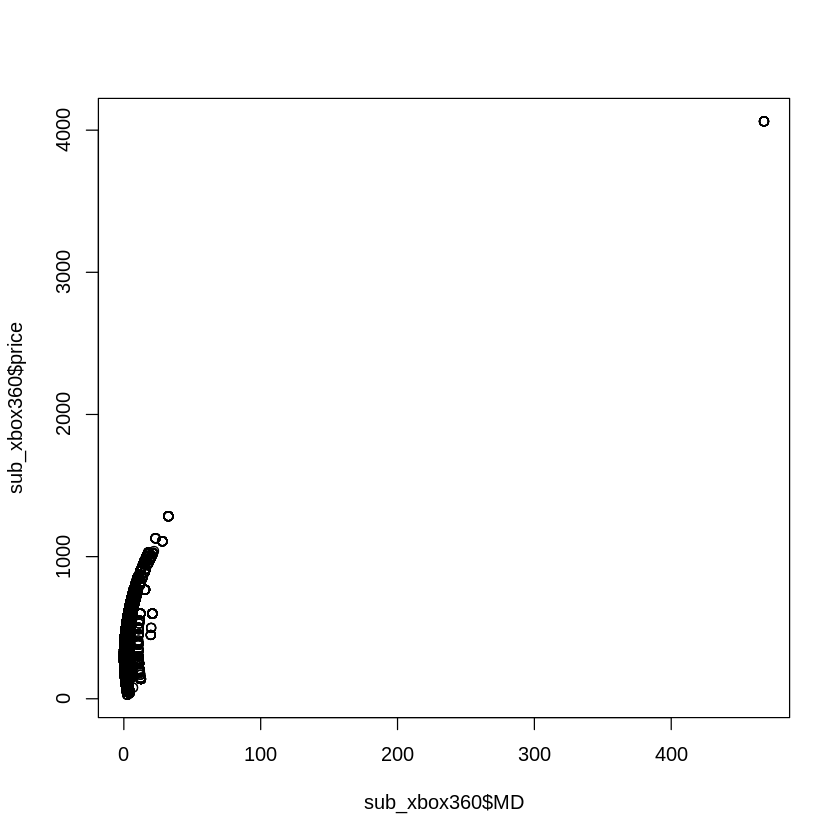

In [102]:
plot(sub_xbox360$MD, sub_xbox360$price)

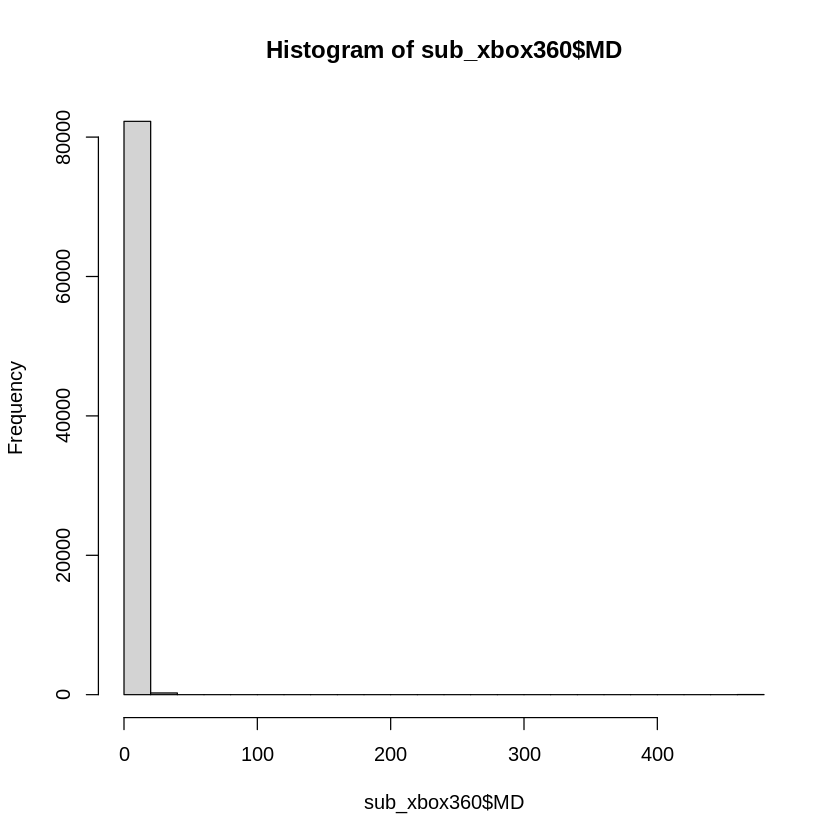

In [104]:
hist(sub_xbox360$MD)

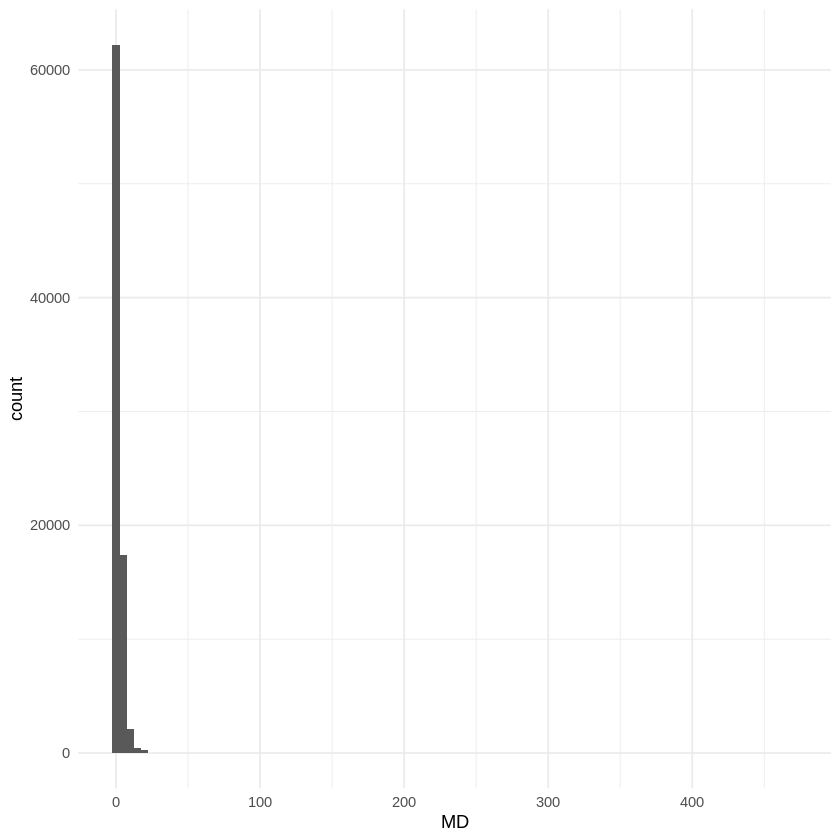

In [128]:
hist_md <- ggplot(sub_xbox360, aes(x = MD))

# add horizontal lines at Q1, Q2, and Q3
hist_md + 
geom_histogram(binwidth = 5, aes(fill = price)) +
#ggtitle("MD histogram") +
theme_minimal()
ggsave("hist_md.png",width=6, height=4,dpi=300)

In [113]:
# Let's create a new column where outliers will be flagged
# called outlier_MD
sub_xbox360$outlier_MD <- FALSE
sub_xbox360$outlier_MD[sub_xbox360$MD > 50] <- TRUE

In [114]:
tail(sub_xbox360)

product_id,date,category,price,weekday,week,store_id,year,month,cpi_adjusted_price,log_of_cpi_adjusted_price,number_of_store_per_product_and_day,total_days_for_product,total_products_in_category,MD,outlier_MD
<int>,<date>,<chr>,<int>,<chr>,<int>,<fct>,<int>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<lgl>
1026418,2016-04-09,Xbox 360,239,Saturday,14,12377,2016,Apr,242.0969,5.489338,6,3521,64,0.237,FALSE
471162,2016-12-31,Xbox 360,149,Saturday,52,2395,2016,Dec,149.0233,5.004103,10,6911,64,0.875,FALSE
1341635,2016-01-29,Xbox 360,269,Friday,4,12377,2016,Jan,274.6698,5.615570,9,8106,64,0.146,FALSE
471162,2016-06-13,Xbox 360,149,Monday,24,11703,2016,Jun,150.5016,5.013974,9,6911,64,0.875,FALSE
2715683,2016-06-28,Xbox 360,414,Tuesday,26,5585,2016,Jun,418.1722,6.035893,6,4227,64,0.551,FALSE
1180267,2015-11-19,Xbox 360,249,Thursday,47,127,2015,Nov,253.7459,5.536333,4,3101,64,0.936,FALSE


In [116]:
#save as a csv file with the new MD column
# MD enables to identify unusual data in the df#
write.csv(sub_xbox360, "sub_xbox60.csv")

Identify the products that are outliers

In [122]:
df_outliers <- sub_xbox360 %>% group_by(price) %>% filter(outlier_MD == "TRUE")

In [124]:
head(df_outliers)

product_id,date,category,price,weekday,week,store_id,year,month,cpi_adjusted_price,log_of_cpi_adjusted_price,number_of_store_per_product_and_day,total_days_for_product,total_products_in_category,MD,outlier_MD
<int>,<date>,<chr>,<int>,<chr>,<int>,<fct>,<int>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<lgl>
2687705,2015-10-06,Xbox 360,4062,Tuesday,41,1260,2015,Oct,4132.309,8.326592,5,4428,64,467.798,TRUE
2687705,2015-04-29,Xbox 360,4062,Wednesday,18,1260,2015,Apr,4147.220,8.330193,3,4428,64,467.798,TRUE
2687705,2015-10-04,Xbox 360,4062,Sunday,40,1260,2015,Oct,4132.309,8.326592,5,4428,64,467.798,TRUE
2687705,2015-02-17,Xbox 360,4062,Tuesday,8,1260,2015,Feb,4150.268,8.330928,3,4428,64,467.798,TRUE
2687705,2015-04-26,Xbox 360,4062,Sunday,17,1260,2015,Apr,4147.220,8.330193,3,4428,64,467.798,TRUE
2687705,2015-10-03,Xbox 360,4062,Saturday,40,1260,2015,Oct,4132.309,8.326592,5,4428,64,467.798,TRUE


In [125]:
dim(df_outliers)

[1] 12 16

There are twelve outliers data points identified.
We can save them as a separate dataframe if interested to analyze them further later on.

In [126]:
# save as a csv file
write.csv(df_outliers, "df_outliers.csv")

In [64]:
ggplot(MD, aes(price)) +
geom_density(kernel = "gaussian")

ERROR: ignored

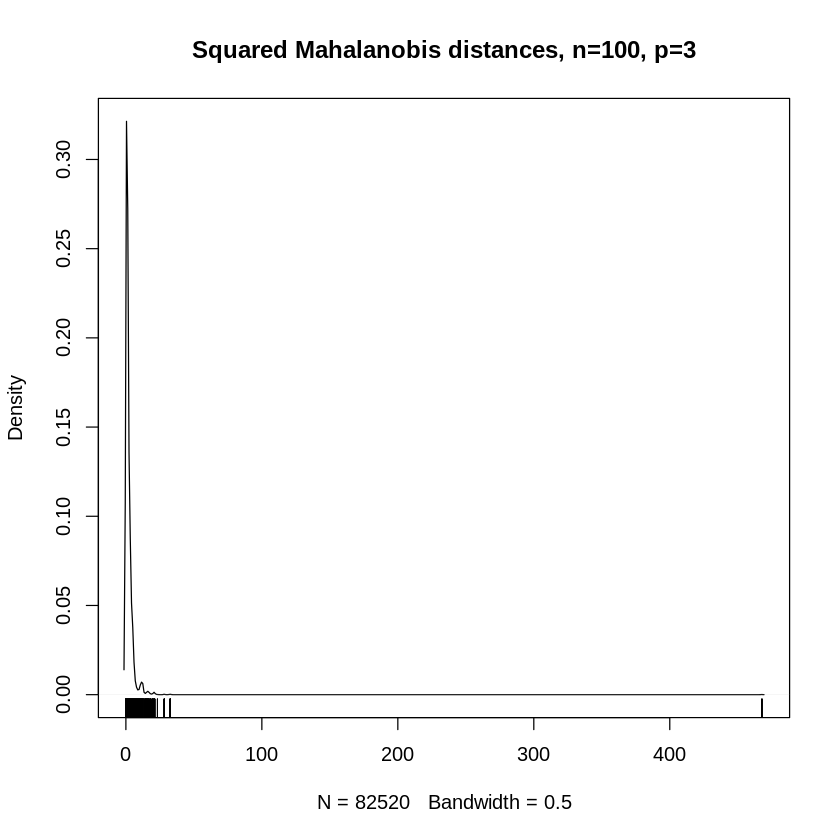

In [66]:
plot(density(MD, bw = 0.5),
     main="Squared Mahalanobis distances, n=100, p=3") ; rug(MD)


In [72]:
qqplot(qchisq(ppoints(100), df = 3), D2,
       main = expression("Q-Q plot of Mahalanobis" * ~D^2 *
                         "vs. quantiles of" * ~ chi[3]^2))
abline(0, 1, col = 'gray')

ERROR: ignored

Now that we've decided not to consider outliers beyond a 1500 price in later visualizations, let's look at data in more granular way by zooming into months.

Warning message:
“Removed 12 rows containing missing values (geom_point).”
Warning message:
“Removed 12 rows containing missing values (geom_point).”


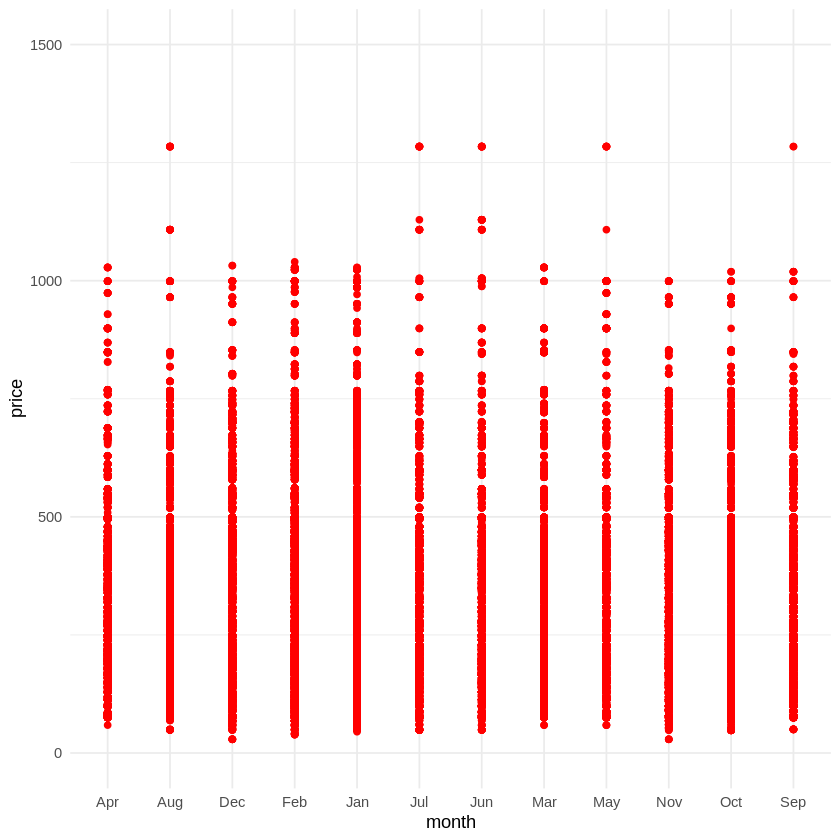

In [73]:
plot4 <- ggplot(sub_xbox360, aes(x = month, y = price))

plot4 + geom_point(colour = "red") +
scale_y_continuous(limits = c(0, 1500)) +
theme_minimal() +
ggsave("plot4.png",width=6, height=4,dpi=300)


In [83]:
# let's zoom in deeper
plot04 <- ggplot(subset(sub_xbox360[,], aes(x = year, y = price))

plot04 +
#geom_histogram(kernel = "gaussian") +
#scale_x_continuous(limits = c(2012, 2015)) +
#scale_y_continuous(limits = c(0, 1500)) +
theme_minimal()

ERROR: ignored

In [ ]:
?boxplot.stats

In [ ]:
# identify the outliers
#sub_xbox360$store_id[!sub_xbox360$store_id %in% boxplot.stats(sub_xbox360$store_id)$out]

In [ ]:
# check Mahalanobis distance for determining outliners
# and explaining why
# source: https://towardsdatascience.com/mahalonobis-distance-and-outlier-detection-in-r-cb9c37576d7d
# https://www.datacamp.com/community/tutorials/pca-analysis-r

Warning message:
“Removed 38 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 38 rows containing non-finite values (stat_boxplot).”


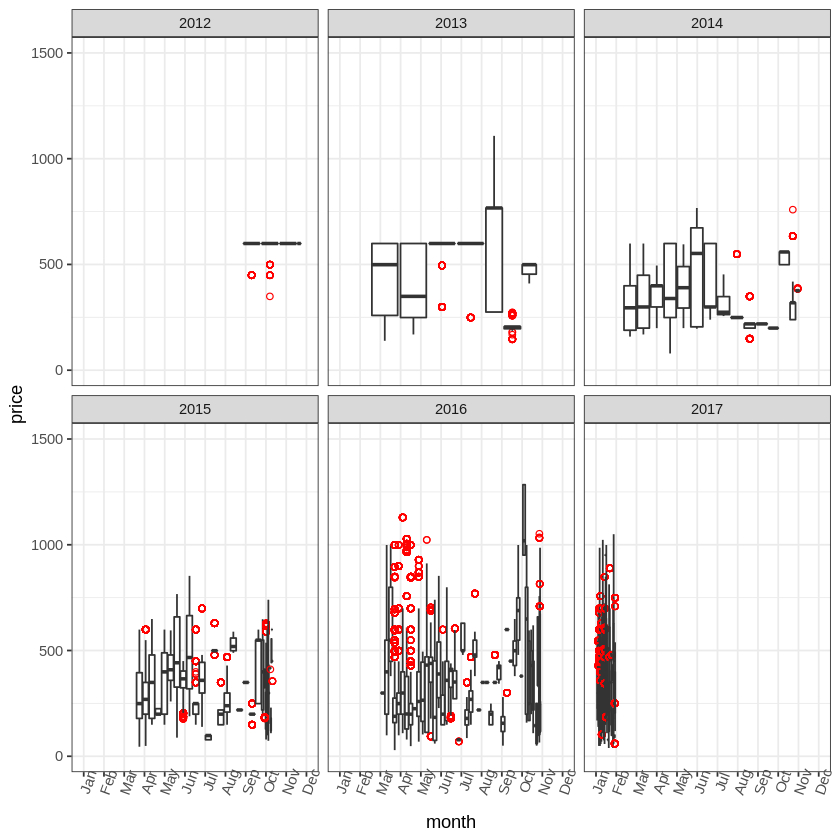

In [84]:
# There seeems to be outliners.
# Let's plot by year over the months

#sub_xbox360$store_id <- as.factor(sub_xbox360$store_id)

bxp2 <- ggplot(data = xbox360, mapping = aes(x = month, y = price, group = store_id))

bxp2 + geom_boxplot(outlier.colour = "red", outlier.shape = 1) +
scale_y_continuous(limits = c(0, 1500)) +
scale_x_discrete(limits = month.abb) +
facet_wrap(~year) +
theme_bw() +
theme(axis.text.x = element_text(angle = 70)) +
ggsave("bxp2.png",width=6, height=4,dpi=300)

Warning message:
“Removed 38 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 38 rows containing non-finite values (stat_boxplot).”


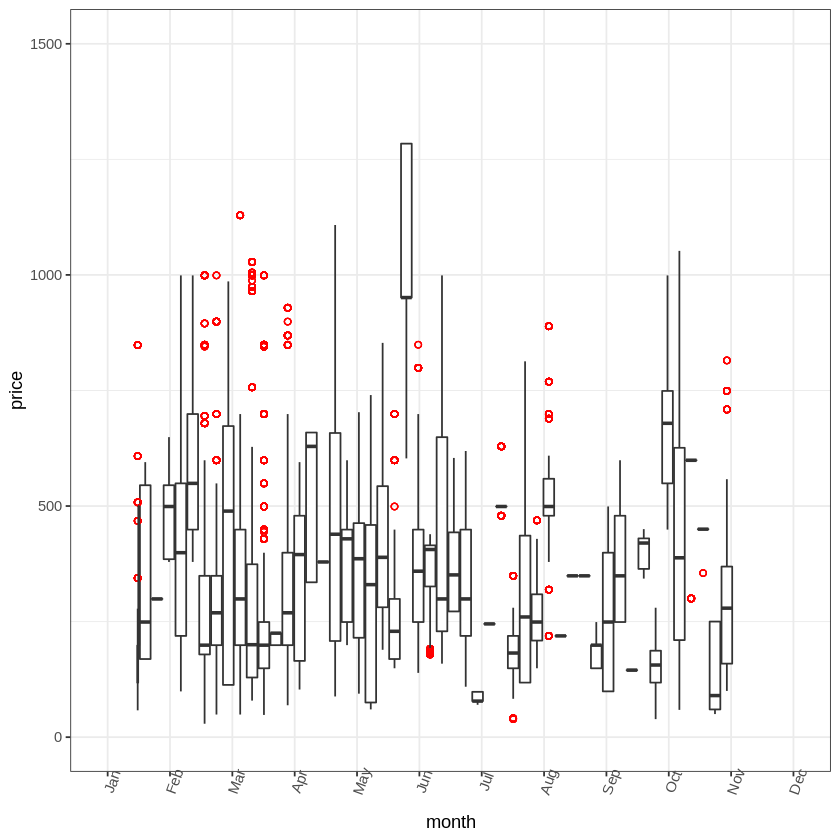

In [88]:
# Let's see if there is a pattern, cyclical behaviour
# Let's plot by month over cumulated years

#bxp2 <- ggplot(data = xbox360, mapping = aes(x = month, y = price, group = store_id))

bxp2 + geom_boxplot(outlier.colour = "red", outlier.shape = 1) +
scale_y_continuous(limits = c(0, 1500)) +
scale_x_discrete(limits = month.abb) +
#facet_wrap(~year) +
theme_bw() +
theme(axis.text.x = element_text(angle = 70)) +
ggsave("bxp02.png",width=6, height=4,dpi=300)

Warning message:
“Removed 38 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 38 rows containing non-finite values (stat_boxplot).”


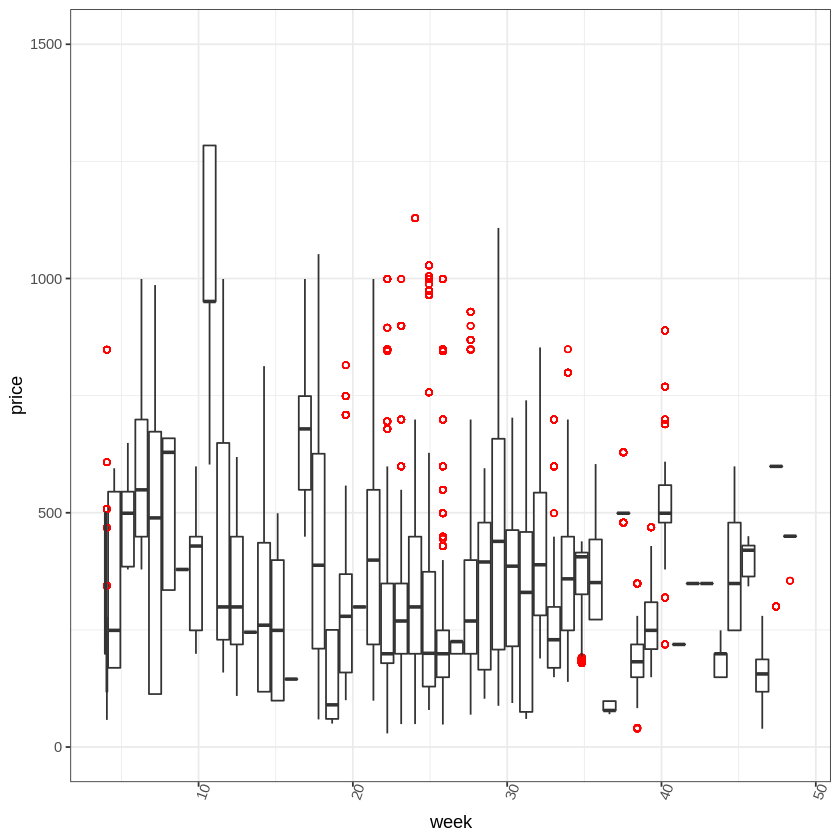

In [89]:
# Let's see if there is a pattern, cyclical behaviour
# Let's plot by month over cumulated years

bxp3 <- ggplot(data = xbox360, mapping = aes(x = week, y = price, group = store_id))

bxp3 + geom_boxplot(outlier.colour = "red", outlier.shape = 1) +
scale_y_continuous(limits = c(0, 1500)) +
#scale_x_discrete(limits = month.abb) +
#facet_wrap(~year) +
theme_bw() +
theme(axis.text.x = element_text(angle = 70)) +
ggsave("bxp3.png",width=6, height=4,dpi=300)

In [ ]:
#?geom_boxplot

Warning message:
“Removed 38 rows containing missing values (geom_point).”
Warning message:
“Removed 38 rows containing missing values (geom_point).”


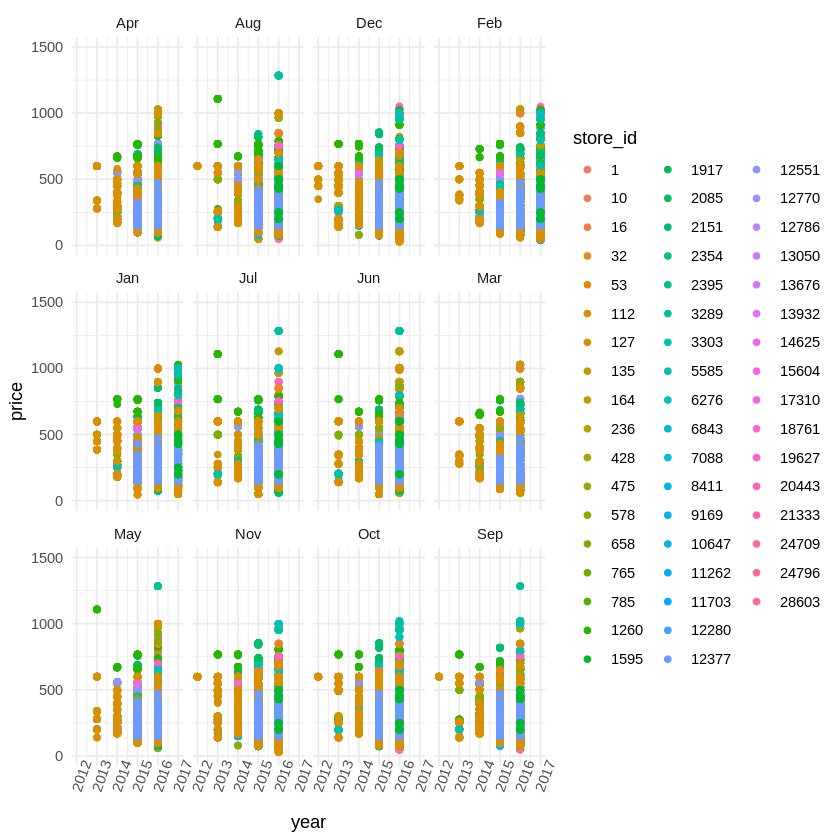

In [ ]:
# Let's plot a 
plot5 <- ggplot(data = xbox360)

plot5 +
  geom_point(mapping = aes(x = year, y = price, colour =store_id)) +
  scale_y_continuous(limits = c(0, 1500)) +
  facet_wrap(~month) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 70)) +
  ggsave("plot5.png",width=6, height=4,dpi=300)

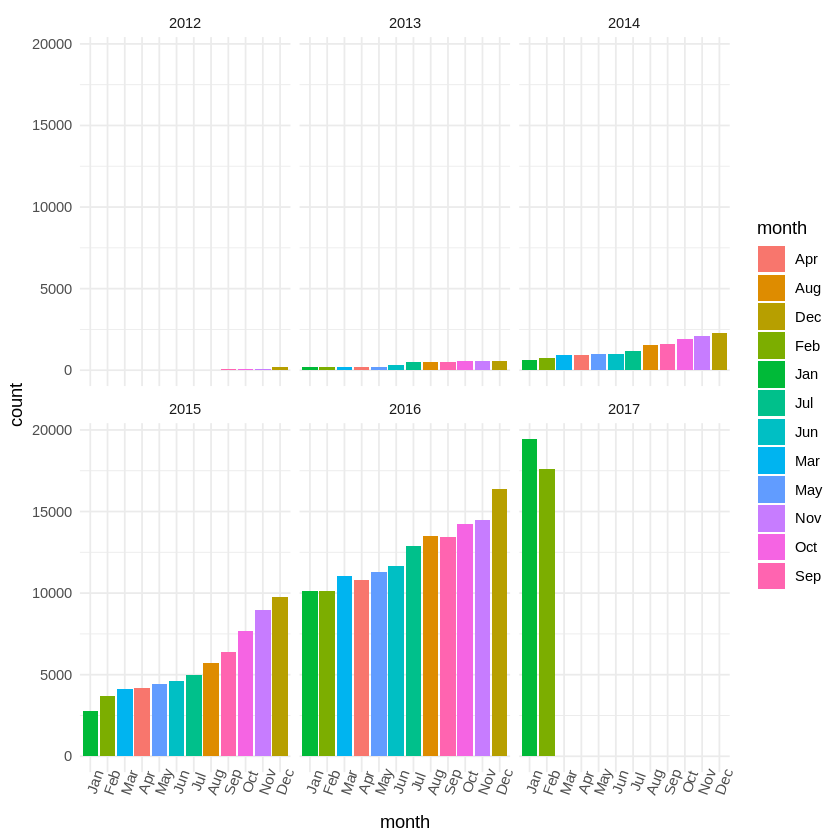

In [ ]:
# Let's plot a 
plot5 +
  #geom_col(mapping = aes(x = month, y = price)) +
  geom_bar(mapping = aes(x = month, fill = month)) +
  #scale_y_continuous(limits = c(0, 3000)) +
  scale_x_discrete(limits = month.abb) +
  facet_wrap(~year) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 70)) +
  ggsave("plot05.png",width=6, height=4,dpi=300)
  #geom_smooth(method = lm)

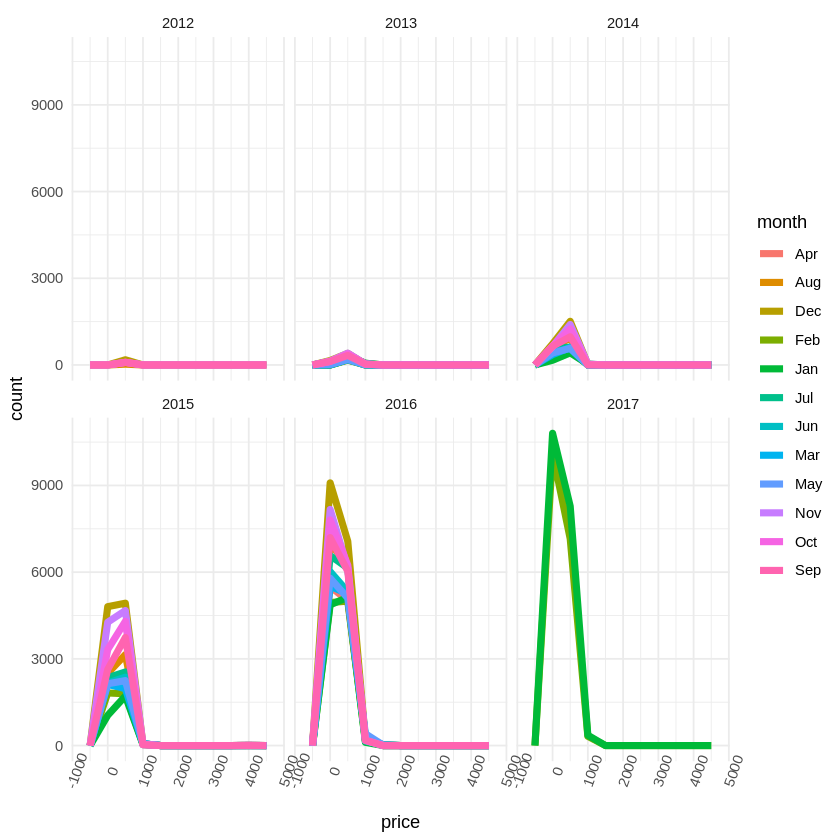

In [ ]:
plot6 <- ggplot(xbox360, aes(price, colour = month))

plot6 + geom_freqpoly(binwidth = 500, size=2) +
facet_wrap(~year) +
theme_minimal() +
theme(axis.text.x = element_text(angle = 70)) +
ggsave("plot6.png",width=6, height=4,dpi=300)

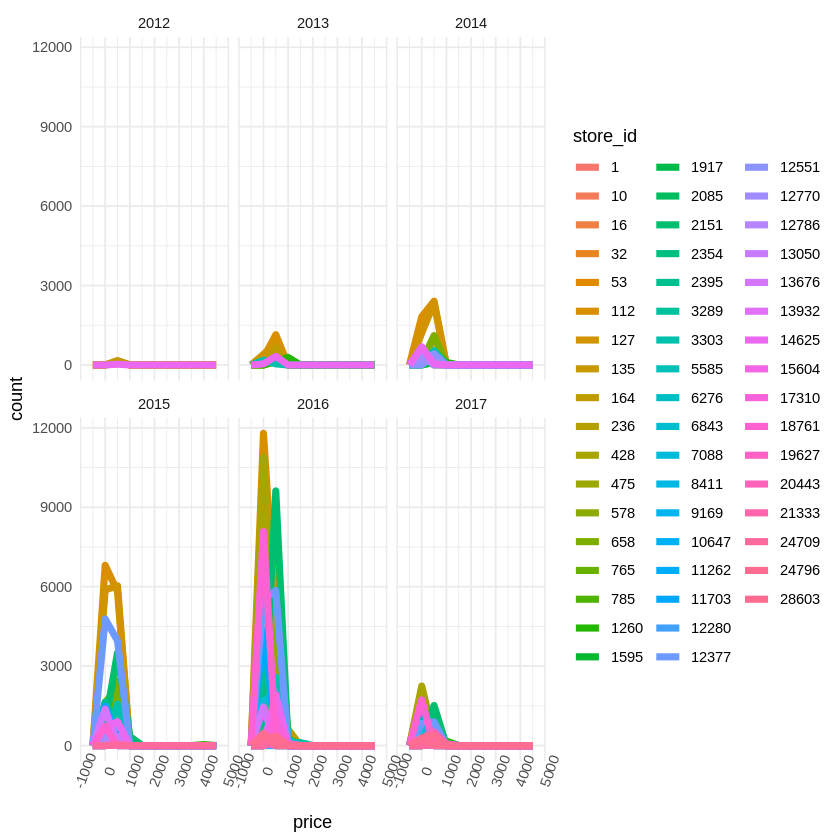

In [ ]:
plot7 <- ggplot(xbox360, aes(price, colour = store_id))

plot7 + geom_freqpoly(binwidth = 500, size=2) +
facet_wrap(~year) +
theme_minimal() +
theme(axis.text.x = element_text(angle = 70)) +
ggsave("plot7.png",width=6, height=4,dpi=300)

In [ ]:
plot8 <- ggplot(xbox360, aes(price))

plot8 +
      geom_histogram(aes(fill=..count..), bins = 30) +
      scale_fill_gradient("Count", low = "grey", high = "blue")+
      geom_density(position = "stack") +
      theme_minimal() +
      ggsave("plot08.png",width=6, height=4,dpi=300)

ERROR: ignored

Warning message:
“Removed 281 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 281 rows containing non-finite values (stat_density).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 281 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 281 rows containing non-finite values (stat_density).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


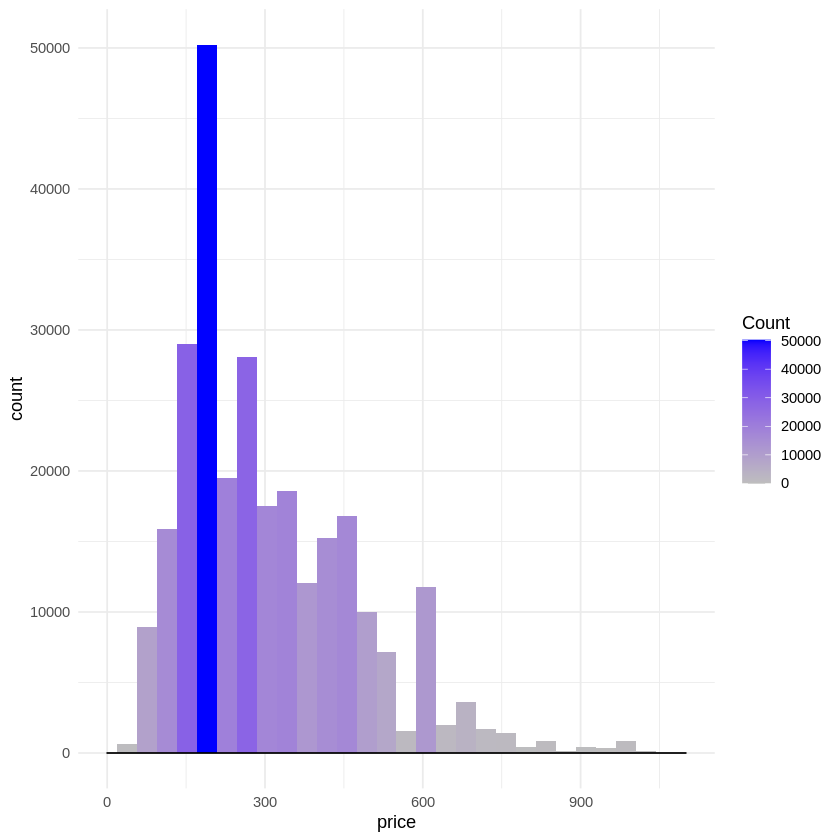

In [ ]:
# We observe that most data are located between price range of 0 and 1100
# Let's scale it dowm to it and observe the data distribution
plot8 +
      geom_histogram(aes(fill=..count..), bins = 30) +
      scale_fill_gradient("Count", low = "grey", high = "blue")+
      scale_x_continuous(limits = c(0, 1100)) +
      theme_minimal() +
      ggsave("plot008.png",width=6, height=4,dpi=300)

In [ ]:
# Let's plot with autoplot function
install.packages("forecast")
install.packages("ffp2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘ffp2’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [ ]:
install.packages(c("quantmod", "xts", "tseries", "forecast", "timeseries"), dependencies = TRUE)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘timeseries’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Warning message:
“Perhaps you meant ‘timeSeries’ ?”
also installing the dependencies ‘bit’, ‘bit64’, ‘plogr’, ‘tinytex’, ‘x13binary’, ‘RMySQL’, ‘RSQLite’, ‘timeSeries’, ‘downloader’, ‘chron’, ‘fts’, ‘tis’, ‘RUnit’, ‘forecTheta’, ‘rticles’, ‘seasonal’, ‘uroot’




In [ ]:
library(forecast)
library(fpp2)


ERROR: ignored

In [ ]:
plot8 +
geom_smooth()

ERROR: ignored

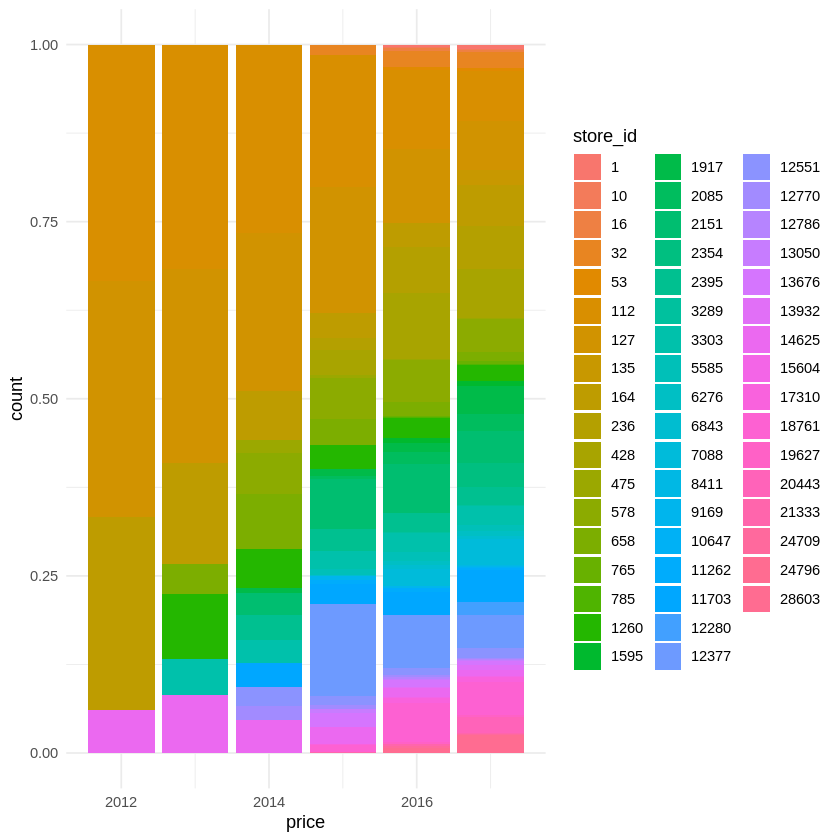

In [ ]:
plot9 <- ggplot(xbox360, aes(year))

plot9 +
      geom_bar(mapping = aes(x = year, fill = store_id), position = "fill") +
      #scale_fill_gradient("Count", low = "grey", high = "blue") +
      theme_minimal() +
      ggsave("plot9.png",width=6, height=4,dpi=300)

In [ ]:
plot8 +
      geom_bar(mapping = aes(x = year, fill = store_id), position = "fill") +
      #scale_fill_gradient("Count", low = "grey", high = "blue") +
      theme_minimal() +
      ggsave("plot008.png",width=6, height=4,dpi=300)

In [63]:
# Analyze possible correlation between features of the dataset
# install needed packages
install.packages("pps")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
predictive power scores (PPS)

## Clustering

In [ ]:
tail(Headphones,3)

product_id,date,category,price,weekday,week,store_id,year,month,cpi_adjusted_price,log_of_cpi_adjusted_price,number_of_store_per_product_and_day,total_days_for_product,total_products_in_category
<int>,<date>,<chr>,<int>,<chr>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<int>,<int>,<int>
969989,2016-05-12,Headphones,656,Thursday,19,4819,2016,May,663.3025,6.497231,20,19403,987
969989,2016-05-12,Headphones,547,Thursday,19,1260,2016,May,553.0891,6.315519,20,19403,987
969989,2016-05-12,Headphones,394,Thursday,19,2380,2016,May,398.3859,5.987421,20,19403,98


In [ ]:
# Normalization
z <- Headphones[, c(4,8)]
m <- apply(z, 2, mean)
s <- apply(z, 2, sd)
z <- scale(z, m, s)


In [ ]:
# Calculate the Euclidean distance
distance <- dist(z)
distance
print(distance, digits = 2)

## Experiments

Note. To check whether a variable is not in a typle (x,y)
with dplyr package



```
'%!in%' <- function(x,y)!('%in%'(x,y))
```



In [ ]:
# Identify unique values for column year
sub_headphones$year[!duplicated(sub_headphones$year)]

[1] 2014 2015 2016 2017 2012 2013

In [ ]:
# Or with namespace ‘dplyr’, alreadyimported by ‘plotly’, ‘tidyr’

distinct(data.frame(sub_headphones$year))             # Using distinct function

sub_headphones.year
<int>
2014
2015
2016
2017
2012
2013


In [ ]:
# convert the string of dates into R 'Date' object
# source: https://stats.idre.ucla.edu/r/faq/how-can-i-format-a-string-containing-a-date-into-r-date-object/

 sub_headphones$date <- as.Date(sub_headphones$date, "%Y-%m-%d"); head(sub_headphones$date,3)

[1] "2014-09-19" "2014-09-21" "2014-09-21"

In [ ]:
class(sub_headphones$date)

[1] "Date"